## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def h5load(ifile, label):
    with pd.HDFStore(ifile, 'r') as store:
        data = store[label] 
        metadata = store.get_storer(label).attrs.metadata
        return data, metadata

In [11]:
f = '../out.hdf5'
event_vars, m = h5load(f,'vars')

In [12]:
event_vars

,ntracks,ngood_fastjets,ht,HLT_PFHT1050,eta_ak4jets0,phi_ak4jets0,pt_ak4jets0,eta_ak4jets1,phi_ak4jets1,pt_ak4jets1,...,SUEP_pt_avg_b_CO,SUEP_pt_mean_scaled_CO,SUEP_S1_CO,SUEP_pt_avg_CO,SUEP_rho0_CO,SUEP_rho1_CO,SUEP_pt_CO,SUEP_eta_CO,SUEP_phi_CO,SUEP_mass_CO
0,0,0,2190.00000,True,0.838135,-0.139984,2190.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,1648.00000,True,-0.201416,-2.590332,1648.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,1558.00000,True,0.405640,2.052734,1558.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,97,2,1335.90625,True,0.022739,1.270996,566.0,0.359619,-1.330322,514.50,...,5.640436,0.072563,0.457134,6.373397,0.000000,0.000000,251.990875,1.138996,-1.935661,464.656494
4,87,2,1304.68750,True,0.734863,0.681763,575.0,0.345215,-2.447266,493.25,...,5.852824,0.133495,0.476221,6.456722,0.000000,0.000000,324.912811,1.248316,0.673842,496.516941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,59,2,1434.62500,True,0.604736,-0.363098,695.0,-0.222260,2.820312,695.00,...,4.371002,0.151522,0.193018,8.135870,5.998927,0.489673,315.421051,0.512990,-0.341476,256.045983
2552,66,2,1554.59375,True,0.103683,3.016602,589.5,-1.568604,-0.221497,526.00,...,3.338078,0.065163,0.344897,9.754079,0.000000,0.105106,492.715179,0.257862,3.056377,214.982502
2553,97,2,1512.31250,True,-0.035309,-0.419678,658.5,0.815918,2.648926,555.00,...,5.247642,0.101992,0.398268,7.841960,0.000000,0.208576,415.766418,0.695283,2.686628,506.674435
2554,111,2,1258.25000,True,-0.631592,-1.677490,622.0,1.114502,1.403076,400.00,...,3.471428,0.064015,0.237147,5.427434,0.000000,0.000000,306.468353,0.546691,1.521210,507.185623


In [6]:
for key in event_vars:
    print(key)

ntracks
ngood_fastjets
ht
HLT_PFHT1050
eta_ak4jets0
phi_ak4jets0
pt_ak4jets0
eta_ak4jets1
phi_ak4jets1
pt_ak4jets1
eta_ak4jets2
phi_ak4jets2
pt_ak4jets2
eta_ak4jets3
phi_ak4jets3
pt_ak4jets3
eta_ak4jets4
phi_ak4jets4
pt_ak4jets4
eta_ak4jets5
phi_ak4jets5
pt_ak4jets5
eta_ak4jets6
phi_ak4jets6
pt_ak4jets6
eta_ak4jets7
phi_ak4jets7
pt_ak4jets7
eta_ak4jets8
phi_ak4jets8
pt_ak4jets8
eta_ak4jets9
phi_ak4jets9
pt_ak4jets9
ngood_ak4jets
ngood_tracker_ak4jets
n_loose_ak4jets
n_tight_ak4jets
ht_loose
ht_tight
ht_tracker
Pileup_nTrueInt
PV_npvs
PV_npvsGood
resnet_SUEP_pred_model125
resnet_SUEP_pred_model126
resnet_SUEP_pred_model127
resnet_SUEP_pred_model128
resnet_SUEP_pred_model129
resnet_SUEP_pred_model130
resnet_SUEP_pred_model131
resnet_SUEP_pred_model132
resnet_SUEP_pred_model133
resnet_SUEP_pred_model134
resnet_SUEP_pred_model135
SUEP_dphi_SUEP_ISR_IRM
SUEP_nconst_IRM
SUEP_pt_avg_b_IRM
SUEP_pt_mean_scaled_IRM
SUEP_S1_IRM
SUEP_pt_avg_IRM
SUEP_rho0_IRM
SUEP_rho1_IRM
SUEP_pt_IRM
SUEP_eta_IRM


In [8]:
event_vars['resnet_SUEP_pred_model126']

0    0.999991
1    1.000000
2    0.999988
3    0.999999
4    1.000000
Name: resnet_SUEP_pred_model126, dtype: float32

In [33]:
jets = event_vars['ngood_fastjets']
htloose = event_vars['ht_loose']
httight = event_vars['ht_tight']

(array([1.4600e+02, 0.0000e+00, 4.4440e+03, 0.0000e+00, 3.6554e+04,
        0.0000e+00, 2.6530e+03, 0.0000e+00, 7.7000e+01, 2.0000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

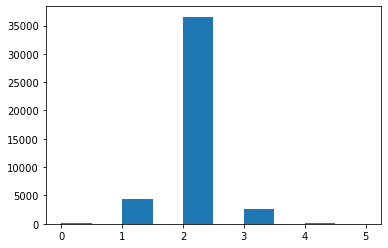

In [34]:
plt.hist(jets)

64909205.15625
64774388.28125


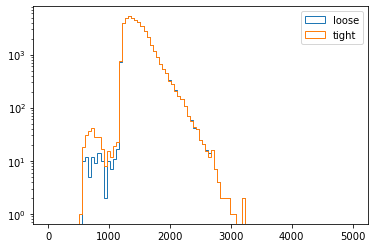

In [35]:
plt.hist(htloose, bins=np.linspace(0,5000,100),  histtype='step', label='loose')
plt.hist(httight, bins=np.linspace(0,5000,100), histtype='step', label='tight')
plt.yscale('log')
plt.legend()
print(np.sum(htloose))
print(np.sum(httight))